# Aula - Mineração de Dados

## Agrupamento | Clusterização

Criado por: Matheus P. Bruder

Este é o notebook é utilizado para solucionar os exercícios propostos durante a a parte prática da aula do dia 17-11-2020.

# Parte Prática

Nesta seção faremos um exemplo prático da utilização do algoritmo K-means, seguindo o tutorial encontrado no medium ([Medium - link](https://medium.com/programadores-ajudando-programadores/k-means-o-que-%C3%A9-como-funciona-aplica%C3%A7%C3%B5es-e-exemplo-em-python-6021df6e2572#:~:text=K%2DMeans%20%C3%A9%20um%20algoritmo,lojas%2Fcentro%20logistico)).

## Vamos ao exemplo: 

A rede de lojas Bruno tem 19 lojas em algumas das principais cidades do país. A empresa pensa em construir 3 centros logísticos para abastecer as lojas. Mas, qual seria a posição ótima para cada um desses três hubs, considerando apenas a posição (coordenadas geográficas) das lojas?

Abaixo, plotamos no gráfico a representação em coordenadas de cada uma das 19 cidades onde a rede possui filiais.

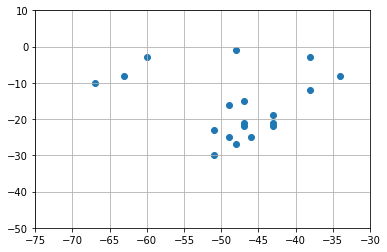

In [78]:
dataset = np.array([
    #matriz com as coordenadas geográficas de cada loja

    [-25, -46], #são paulo
    [-22, -43], #rio de janeiro
    [-25, -49], #curitiba
    [-30, -51], #porto alegre
    [-19, -43], #belo horizonte
    [-15, -47], #brasilia
    [-12, -38], #salvador
    [-8, -34], #recife
    [-16, -49], #goiania
    [-3, -60], #manaus
    [-22, -47], #campinas
    [-3, -38], #fortaleza
    [-21, -47], #ribeirão preto
    [-23, -51], #maringa
    [-27, -48], #florianópolis
    [-21, -43], #juiz de fora
    [-1, -48], #belém
    [-10, -67], #rio branco
    [-8, -63] #porto velho
     
])

plt.scatter(dataset[:,1], dataset[:,0]) #posicionamento dos eixos x e y
plt.xlim(-75, -30) #range do eixo x
plt.ylim(-50, 10) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico

O ponto mais ao sul no gráfico representa Porto Alegre, o ponto mais à Oeste representa Rio Branco, o ponto mais à leste representa Recife e o ponto mais ao norte representa Belém.

Vamos utilizar o algoritmo KMeans, do pacote Scikit-Learn para agrupar (clusterisar) as nossas filiais em 3 grupos. Cada grupo será servido por um centro logístico, que será representado por um centróide.

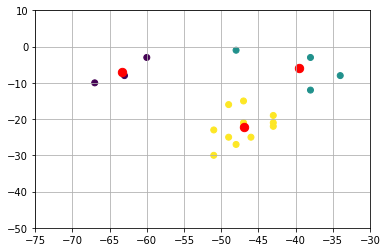

In [79]:
kmeans = KMeans(
    n_clusters = 3, #numero de clusters
    init = 'k-means++', 
    n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva
    max_iter = 300 #numero máximo de iterações
) 

pred_y = kmeans.fit_predict(dataset)

plt.scatter(dataset[:,1], dataset[:,0], c = pred_y) #posicionamento dos eixos x e y
plt.xlim(-75, -30) #range do eixo x
plt.ylim(-50, 10) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico

plt.scatter(
    kmeans.cluster_centers_[:,1],
    kmeans.cluster_centers_[:,0], 
    s = 70, 
    c = 'red'
) #posição de cada centroide no gráfico

plt.show()

In [1]:
import numpy as np #para manipular os vetores
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans #para usar o KMeans



---



# Exercício 01

Dados dois objetos representados pelas tuplas (22, 1, 42, 10) e (20, 0, 36, 8):

 -  *Calcule a distância euclidiana entre os dois objetos.*
 - *Calcule a distância de Manhattan entre os dois objetos.*
 - *Calcule a distância de Minkowski entre os dois objetos, usando q = 3.*


In [2]:
def euclidean_distance(tuples):
    tot = 0
    for x1, x2 in tuples:
        tot += ((x1 - x2)**2)
    return tot ** (1/2)


def manhattan_distance(tuples):
    tot = 0
    for x1, x2 in tuples:
        tot += abs(x1 - x2)
    return tot


def minkowski_distance(tuples, p=3):
    tot = 0
    for x1, x2 in tuples:
        tot += ((abs(x1 - x2))**(p))
    return tot ** (1/p)


t1 = (22, 1, 42, 10)
t2 = (20, 0, 36, 8)

t = list(zip(t1, t2))

de = euclidean_distance(t)
dma = manhattan_distance(t)
dmi = minkowski_distance(t, 3)

print(f'Dist. Euclidiana: \t{de:^10.5}\nDist. Manhattan: \t{dma:^10}\nDist. Minkowski: \t{dmi:^10.5}')

Dist. Euclidiana: 	  6.7082  
Dist. Manhattan: 	    11    
Dist. Minkowski: 	  6.1534  


# Exercício 02 

Suponha que a tarefa de mineração de dados seja agrupar os oito pontos a seguir (com (x, y) representando o local) em três grupos:

Ponto | Valor
:----: | :----:
A1 | (2, 10)
A2 | (2, 5)
A3 | (8, 4)
B1 | (5, 8)
B2 | (7, 5)
B3 | (6, 4)
C1 | (1, 2)
C2 | (4, 9)

A função de distância é a distância euclidiana. Suponha que inicialmente atribuímos A1, B1 e C1 como o centro de cada cluster, respectivamente. Use o algoritmo k-means para mostrar apenas:

 - *Os três centros de cluster após a execução da primeira rodada*
 - *Os três grupos finais*


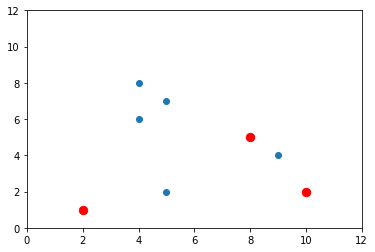

In [17]:
k = 3

dados = np.array([
    [2, 10],
    [2, 5],
    [8, 4],
    [5, 8],
    [7, 5],
    [6, 4],
    [1, 2],
    [4, 9]
])

centroides = np.array([
    [2, 10],
    [5, 8],
    [1, 2]
])

# colmap = {1: 'r', 2: 'g', 3: 'b'}

plt.scatter(dados[:,1], dados[:,0]) #posicionamento dos eixos x e y -> DADOS
plt.scatter(centroides[:,1], centroides[:,0], s=70, c='r') # -> CENTROIDES

plt.xlim(0, 12) # range do eixo x
plt.ylim(0, 12) # range do eixo y
plt.show() #função que desenha a grade no nosso gráfico

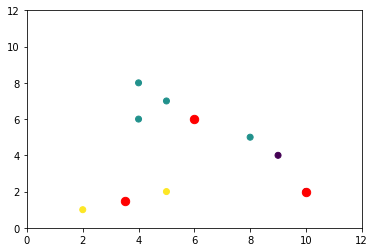

In [18]:
k_means = KMeans(
    n_clusters = 3, #numero de clusters
    init = centroides,
    n_init = 1, #algoritmo que define a posição dos clusters de maneira mais assertiva
    max_iter = 1 #numero máximo de iterações
) 

pred_y = k_means.fit_predict(dados)

plt.scatter(dados[:,1], dados[:,0], c = pred_y) #posicionamento dos eixos x e y
plt.xlim(0, 12) #range do eixo x
plt.ylim(0, 12) #range do eixo y

plt.scatter(
    k_means.cluster_centers_[:,1],
    k_means.cluster_centers_[:,0], 
    s = 70, 
    c = 'red'
) #posição de cada centroide no gráfico

plt.show()

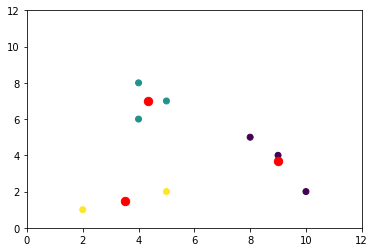

In [19]:
k_means = KMeans(
    n_clusters = 3, #numero de clusters
    init = centroides,
    n_init = 1, #algoritmo que define a posição dos clusters de maneira mais assertiva
    max_iter = 300 #numero máximo de iterações
) 

pred_y = k_means.fit_predict(dados)

plt.scatter(dados[:,1], dados[:,0], c = pred_y) #posicionamento dos eixos x e y
plt.xlim(0, 12) #range do eixo x
plt.ylim(0, 12) #range do eixo y

plt.scatter(
    k_means.cluster_centers_[:,1],
    k_means.cluster_centers_[:,0], 
    s = 70, 
    c = 'red'
) #posição de cada centroide no gráfico

plt.show()